## Data Science Test -- CARTO

### Import all relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(15,12)})


### Import all data

In [2]:
mar_data = pd.read_csv('yellow_tripdata_2017-03.csv')

jun_data = pd.read_csv('yellow_tripdata_2017-06.csv')

nov_data = pd.read_csv('yellow_tripdata_2017-11.csv')

dec_data = pd.read_csv('yellow_tripdata_2017-12.csv')

In [3]:
mar_data.shape
print("March Dataset Make-Up: ", mar_data.shape)

jun_data.shape
print("June Dataset Make-Up: ", jun_data.shape)

nov_data.shape
print("November Dataset Make-Up: ", nov_data.shape)

dec_data.shape
print("December Dataset Make-Up: ", dec_data.shape)

March Dataset Make-Up:  (10294628, 17)
June Dataset Make-Up:  (9656993, 17)
November Dataset Make-Up:  (9284803, 17)
December Dataset Make-Up:  (9508276, 17)


#### Dataset Constituents

* March Dataset consist of 10294628 observations and 17 characteristics
* June Dataset  consist of 9656993 observations and 17 characteristics
* November Dataset  consist of 9284803 observations and 17 characteristics
* December Dataset  consist of 9508276 observations and 17 characteristics

##### Checking for all null columns in the data

In [4]:
mar_null_col = mar_data.columns[mar_data.isnull().any()]
print("\n *March Null Data:* \n", mar_data[mar_data.isnull().any(axis=1)][mar_null_col].head())

jun_null_col = jun_data.columns[jun_data.isnull().any()]
print("\n *June Null Data:* \n", jun_data[jun_data.isnull().any(axis=1)][jun_null_col].head())

nov_null_col = nov_data.columns[nov_data.isnull().any()]
print("\n *November Null Data:* \n", nov_data[nov_data.isnull().any(axis=1)][nov_null_col].head())

dec_null_col = dec_data.columns[dec_data.isnull().any()]
print("\n *December Null Data:* \n", dec_data[dec_data.isnull().any(axis=1)][dec_null_col].head())


 *March Null Data:* 
 Empty DataFrame
Columns: []
Index: []

 *June Null Data:* 
 Empty DataFrame
Columns: []
Index: []

 *November Null Data:* 
 Empty DataFrame
Columns: []
Index: []

 *December Null Data:* 
 Empty DataFrame
Columns: []
Index: []


######                                                                                          No Null Data!

##### Anomaly Check

In [5]:
#Anomaly_check

null_passenger = mar_data[(mar_data.passenger_count == 0)]
print("Trips with 0 passengers, but with fares and passenger_count: \n", null_passenger)

void_payment_type = mar_data[(mar_data.payment_type > 6)]
void_payment_type2 = void_payment_type[(void_payment_type.payment_type < 0)]
print("Trips with N/A payment_type: \n", void_payment_type)

void_ratecodeID = mar_data[(mar_data.RatecodeID > 6)]
void_ratecodeID2 = void_ratecodeID[(void_ratecodeID.RatecodeID < 0)]
print("Trips with N/A void_ratecodeID: \n", void_ratecodeID2)

void_vendorID = mar_data[(mar_data.VendorID > 2)]
print("Trips with N/A void_vendorID: \n", void_vendorID)

void_store_flag = mar_data[(mar_data.store_and_fwd_flag != 'Y')]
void_store_flag2 = void_store_flag[(void_store_flag.store_and_fwd_flag != 'N')]

print("Trips with N/A void_store_flag: \n", void_store_flag2)

Trips with 0 passengers, but with fares and passenger_count: 
           VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
4900             1  2017-03-10 14:25:40   2017-03-10 14:25:40   
11857            1  2017-03-10 14:48:25   2017-03-10 14:48:25   
40215            1  2017-03-10 16:21:12   2017-03-10 16:21:12   
158512           2  2017-03-10 21:06:40   2017-03-10 21:07:01   
197676           2  2017-03-10 22:50:47   2017-03-10 22:50:50   
...            ...                  ...                   ...   
10272685         2  2017-03-31 22:53:43   2017-03-31 22:53:47   
10276993         2  2017-03-31 23:06:06   2017-03-31 23:06:08   
10284878         2  2017-03-31 23:29:36   2017-03-31 23:29:40   
10288262         1  2017-03-31 23:39:56   2017-03-31 23:39:56   
10294550         1  2017-03-15 17:01:45   2017-03-15 17:01:45   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
4900                    0            0.0          99                  N   
11857 

###### Anomaly Check shows: 
* 595 records that has 0 passengers, but has fare_amount, payment_type, store_and_fwd_flag. This is contradictory.
* 204 records with an incorrect RatecodeID, as the value doesn't reside within the limit of 0 to 6 as shown in the data dictionary.
* All other seems fine for now.

#### Checking the datatypes

In [5]:
print("#The Type of March Data are as follows: \n", mar_data.dtypes)

print("#The Type of June Data are as follows: \n", jun_data.dtypes)

print("#The Type of November Data are as follows: \n", nov_data.dtypes)

print("#The Type of December Data are as follows: \n", dec_data.dtypes)

#The Type of March Data are as follows: 
 VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object
#The Type of June Data are as follows: 
 VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount 

#### Convert the pickup and dropoff times from string to the datetime format

In [6]:
mar_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = mar_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime)

jun_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = jun_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime)

nov_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = nov_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime)

dec_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = dec_data[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime)

#### Re-confirm Data Types

In [7]:
print("Formatted Type of March Data are as follows: \n", mar_data.dtypes)

print("Formatted Type of June Data are as follows: \n", jun_data.dtypes)

print("Formatted Type of November Data are as follows: \n", nov_data.dtypes)

print("Formatted Type of December Data are as follows: \n", dec_data.dtypes)

Formatted Type of March Data are as follows: 
 VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object
Formatted Type of June Data are as follows: 
 VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID   

#### Wrangling March Taxi Data

In [9]:
#Attaching trip duration to the dataframe for further exploration

#difference between trip pick-up and trip drop=off
mar_trip_dur = (mar_data["tpep_dropoff_datetime"] - mar_data["tpep_pickup_datetime"])

#convert series to dataframe
mar_trip_dur = mar_trip_dur.to_frame(name = 'trip_dur')

#convert to seconds
mar_trip_dur['trip_dur'] = (mar_trip_dur['trip_dur'].dt.seconds)

#append to main data
#mar_data['Trip_dur_sec'] = mar_trip_dur['trip_dur']

#working on the pickup datetime to extract day_name and hour
mar_trip_pick_day = mar_data['tpep_pickup_datetime']

#convert series to dataframe
mar_trip_pick_day = mar_trip_pick_day.to_frame(name = 'pickup_time')

#extract day name
mar_trip_pick_day['pick_day'] = mar_trip_pick_day['pickup_time'].dt.day_name()

#extract hour
mar_trip_pick_day['pick_hour'] = mar_trip_pick_day['pickup_time'].dt.hour

#append to main data
#mar_data['pickup_day'] = mar_trip_pick_day['pick_day']

#mar_data['pickup_hour'] = mar_trip_pick_day['pick_hour']

mar_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Trip_dur_sec,pickup_day,pickup_hour
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.00,0.3,18.36,849,Thursday,21
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.00,0.3,12.80,661,Thursday,21
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.00,0.3,14.12,608,Thursday,22
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.00,0.3,17.29,29406,Thursday,22
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.00,0.3,13.30,595,Friday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294623,1,2017-03-31 15:15:44,2017-03-31 15:16:53,2,0.00,1,Y,264,264,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,69,Friday,15
10294624,1,2017-03-31 15:21:14,2017-03-31 15:22:49,1,0.00,2,Y,264,264,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,95,Friday,15
10294625,1,2017-03-31 15:23:11,2017-03-31 15:24:13,3,0.00,3,Y,264,264,2,20.5,0.0,0.0,0.00,5.76,0.3,26.56,62,Friday,15
10294626,1,2017-03-31 15:24:34,2017-03-31 15:26:25,2,0.00,5,Y,264,264,2,136.0,0.0,0.0,0.00,5.76,0.3,142.06,111,Friday,15


In [127]:
Sunday = mar_data[mar_data['pickup_day'] == 'Sunday']
sunday_fare = sum(Sunday['fare_amount'])

Monday = mar_data[mar_data['pickup_day'] == 'Monday']
Monday_fare = sum(Monday['fare_amount'])

Tuesday = mar_data[mar_data['pickup_day'] == 'Tuesday']
Tuesday_fare = sum(Tuesday['fare_amount'])

Wednesday = mar_data[mar_data['pickup_day'] == 'Wednesday']
Wednesday_fare = sum(Wednesday['fare_amount'])

Thursday = mar_data[mar_data['pickup_day'] == 'Thursday']
Thursday_fare = sum(Thursday['fare_amount'])

Friday = mar_data[mar_data['pickup_day'] == 'Friday']
Friday_fare = sum(Friday['fare_amount'])

Saturday = mar_data[mar_data['pickup_day'] == 'Saturday']
Saturday_fare = sum(Saturday['fare_amount'])


print("The Sum of fares on Sunday is ", sunday_fare)
print("The Sum of fares on Monday is ", Monday_fare)
print("The Sum of fares on Tuesday is ", Tuesday_fare)
print("The Sum of fares on Wednesday is ", Wednesday_fare)
print("The Sum of fares on Thursday is ", Thursday_fare)
print("The Sum of fares on Friday is ", Friday_fare)
print("The Sum of fares on Saturday is ", Saturday_fare)

The Sum of fares on Sunday is  16353310.300000064
The Sum of fares on Monday is  15785410.650000023
The Sum of fares on Tuesday is  13448063.870000008
The Sum of fares on Wednesday is  21680465.890000172
The Sum of fares on Thursday is  23553665.640000273
The Sum of fares on Friday is  23794548.170000233
The Sum of fares on Saturday is  18328149.820000146


In [130]:
mar_day_occurence = mar_data['pickup_day'].value_counts()
mar_day_occurence = mar_day_occurence.to_frame(name = 'trip_per_day_count')
mar_day_occurence ['day_order'] = ['6','5','4','7','1','2','3']
mar_day_occurence ['day'] = ['Friday','Thursday','Wednesday','Saturday','Sunday','Monday','Tuesday']
mar_day_occurence = mar_day_occurence.sort_values('day_order')
mar_day_occurence ['total_fare'] = [sunday_fare, Monday_fare, Tuesday_fare, Wednesday_fare, Thursday_fare, Friday_fare, Saturday_fare]
mar_day_occurence

,trip_per_day_count,day_order,day,total_fare
Sunday,1267224,1,Sunday,16353310.30
Monday,1216800,2,Monday,15785410.65
Tuesday,1070995,3,Tuesday,13448063.87
Wednesday,1655846,4,Wednesday,21680465.89
Thursday,1750789,5,Thursday,23553665.64
Friday,1815274,6,Friday,23794548.17
Saturday,1517700,7,Saturday,18328149.82


##### Visualization of the days and their sum trip counts

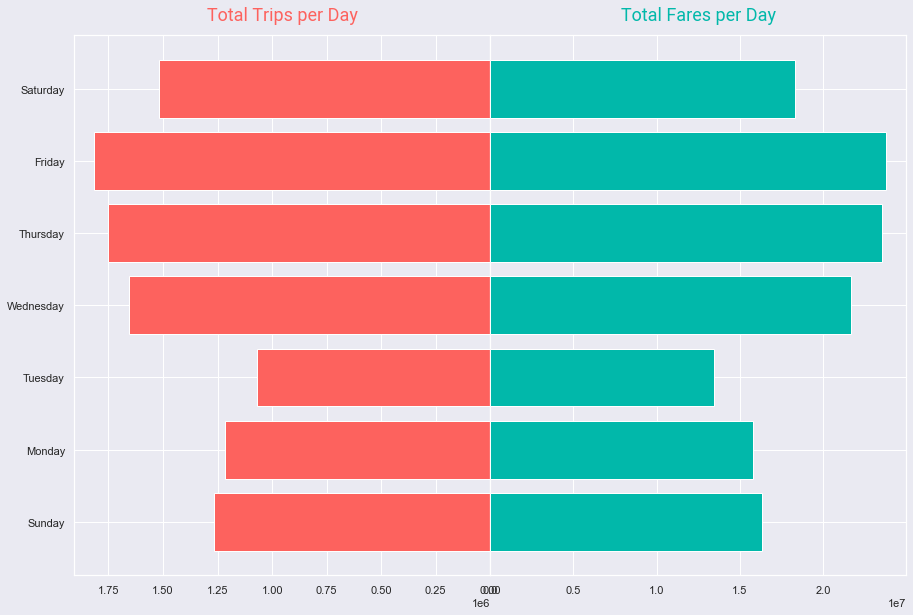

In [175]:
# Visualization of fare and Trip in a bi-directional bar-plot against Day


font_color = '#525252'
hfont = {'fontname':'Roboto'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = mar_day_occurence['day']
column0 = mar_day_occurence['trip_per_day_count']
column1 = mar_day_occurence['total_fare']

title0 = 'Total Trips per Day'
title1 = 'Total Fares per Day'

fig, axes = plt.subplots(figsize=(15,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

# axes[1].set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000])

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

axes[0].invert_xaxis() 
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

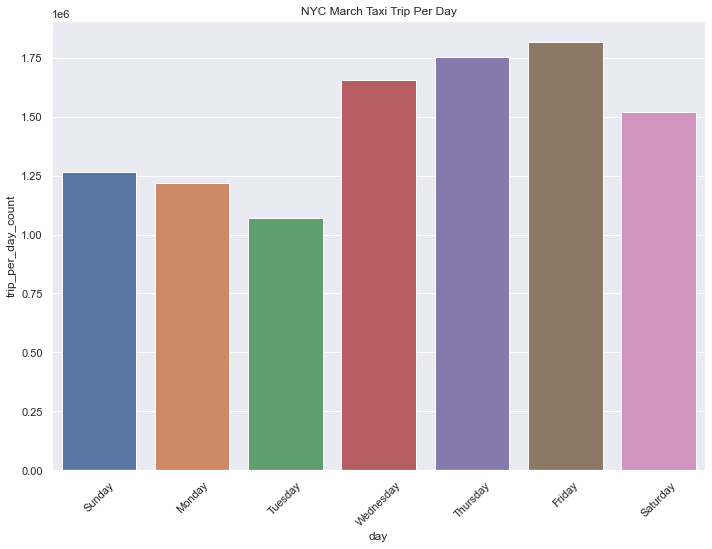

In [133]:
##Visualization of the Daily Trip Count in March

nyc_chart = sns.barplot(data = mar_day_occurence, x = "day", y = "trip_per_day_count").set_title('NYC March Taxi Trip Per Day')
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

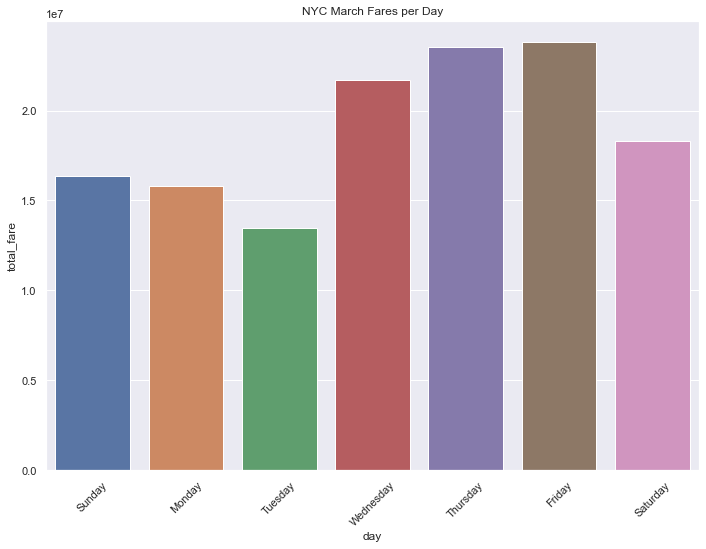

In [134]:
nyc_chart2 = sns.barplot(data = mar_day_occurence, x = "day", y = "total_fare").set_title('NYC March Fares per Day')
plt.xticks(rotation = 45)

In [156]:
mar_hr_occurence = mar_data['pickup_hour'].value_counts()
mar_hr_occurence = mar_hr_occurence.to_frame(name = 'trip_per_hour_count')
mar_hr_occurence = mar_hr_occurence.sort_index()

mar_hr_occurence['time'] = ['12:00 AM', '01:00 AM', '02:00 AM', '03:00 AM', '04:00 AM', '05:00 AM', '06:00 AM', 
'07:00 AM', '08:00 AM', '09:00 AM', '10:00 AM', '11:00 AM','12:00 PM', '01:00 PM', '02:00 PM', '03:00 PM',
'04:00 PM', '05:00 PM', '06:00 PM', '07:00 PM', '08:00 PM', '09:00 PM', '10:00 PM', '11:00 PM']

mar_hr_occurence['hr_order'] = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
                                '20','21','22','23']

mar_hr_occurence['fare_cum_per_hr'] = [mar_hr0, mar_hr1, mar_hr2, mar_hr3, mar_hr4,mar_hr5, mar_hr6, mar_hr7,
                                       mar_hr8, mar_hr9, mar_hr10, mar_hr11, mar_hr12, mar_hr13, mar_hr14, mar_hr15,
                                       mar_hr16, mar_hr17, mar_hr18, mar_hr19, mar_hr20, mar_hr21, mar_hr22, mar_hr23]

mar_hr_occurence

,trip_per_hour_count,time,hr_order,fare_cum_per_hr
0,347212,12:00 AM,0,4685150.53
1,249895,01:00 AM,1,3229542.69
2,167430,02:00 AM,2,2123272.10
3,137643,03:00 AM,3,1804061.88
4,106958,04:00 AM,4,1609231.37
5,106492,05:00 AM,5,1703323.20
6,239484,06:00 AM,6,3141758.54
7,394679,07:00 AM,7,4706746.95
8,485105,08:00 AM,8,5840843.17
9,483515,09:00 AM,9,5916635.96


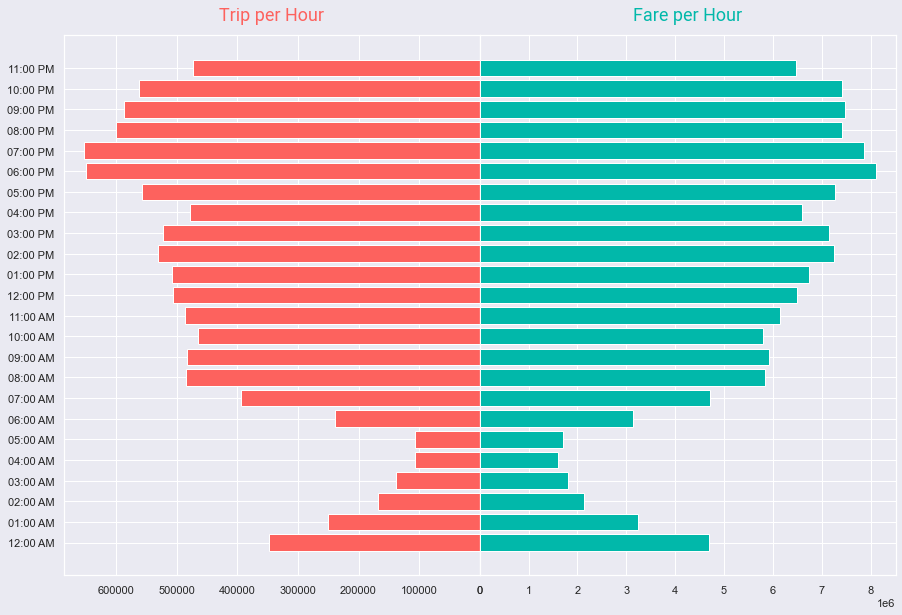

In [174]:
# Visualization of fare and Trip in a bi-directional bar-plot against Hour


font_color = '#525252'
hfont = {'fontname':'Roboto'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = mar_hr_occurence['time']
column0 = mar_hr_occurence['trip_per_hour_count']
column1 = mar_hr_occurence['fare_cum_per_hr']

title0 = 'Trip per Hour'
title1 = 'Fare per Hour'

fig, axes = plt.subplots(figsize=(15,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

# axes[1].set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000])

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

axes[0].invert_xaxis() 
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [ ]:
## working on the fare per hour aspect

m_0_hr = mar_data[mar_data['pickup_hour'] == 0]
mar_hr0 = sum(m_0_hr['fare_amount'])

m_1_hr = mar_data[mar_data['pickup_hour'] == 1]
mar_hr1 = sum(m_1_hr['fare_amount'])

m_2_hr = mar_data[mar_data['pickup_hour'] == 2]
mar_hr2 = sum(m_2_hr['fare_amount'])

m_3_hr = mar_data[mar_data['pickup_hour'] == 3]
mar_hr3 = sum(m_3_hr['fare_amount'])

m_4_hr = mar_data[mar_data['pickup_hour'] == 4]
mar_hr4 = sum(m_4_hr['fare_amount'])

m_5_hr = mar_data[mar_data['pickup_hour'] == 5]
mar_hr5 = sum(m_5_hr['fare_amount'])

m_6_hr = mar_data[mar_data['pickup_hour'] == 6]
mar_hr6 = sum(m_6_hr['fare_amount'])

m_7_hr = mar_data[mar_data['pickup_hour'] == 7]
mar_hr7 = sum(m_7_hr['fare_amount'])

m_8_hr = mar_data[mar_data['pickup_hour'] == 8]
mar_hr8 = sum(m_8_hr['fare_amount'])

m_9_hr = mar_data[mar_data['pickup_hour'] == 9]
mar_hr9 = sum(m_9_hr['fare_amount'])

m_10_hr = mar_data[mar_data['pickup_hour'] == 10]
mar_hr10 = sum(m_10_hr['fare_amount'])

m_11_hr = mar_data[mar_data['pickup_hour'] == 11]
mar_hr11 = sum(m_11_hr['fare_amount'])

m_12_hr = mar_data[mar_data['pickup_hour'] == 12]
mar_hr12 = sum(m_12_hr['fare_amount'])

m_13_hr = mar_data[mar_data['pickup_hour'] == 13]
mar_hr13 = sum(m_13_hr['fare_amount'])

m_14_hr = mar_data[mar_data['pickup_hour'] == 14]
mar_hr14 = sum(m_14_hr['fare_amount'])

m_15_hr = mar_data[mar_data['pickup_hour'] == 15]
mar_hr15 = sum(m_15_hr['fare_amount'])

m_16_hr = mar_data[mar_data['pickup_hour'] == 16]
mar_hr16 = sum(m_16_hr['fare_amount'])

m_17_hr = mar_data[mar_data['pickup_hour'] == 17]
mar_hr17 = sum(m_17_hr['fare_amount'])

m_18_hr = mar_data[mar_data['pickup_hour'] == 18]
mar_hr18 = sum(m_18_hr['fare_amount'])

m_19_hr = mar_data[mar_data['pickup_hour'] == 19]
mar_hr19 = sum(m_19_hr['fare_amount'])

m_20_hr = mar_data[mar_data['pickup_hour'] == 20]
mar_hr20 = sum(m_20_hr['fare_amount'])

m_21_hr = mar_data[mar_data['pickup_hour'] == 21]
mar_hr21 = sum(m_21_hr['fare_amount'])

m_22_hr = mar_data[mar_data['pickup_hour'] == 22]
mar_hr22 = sum(m_22_hr['fare_amount'])

m_23_hr = mar_data[mar_data['pickup_hour'] == 23]
mar_hr23 = sum(m_23_hr['fare_amount'])

print("The Sum of fares on hour [0] is", mar_hr0)
print("The Sum of fares on hour [1] is", mar_hr1)
print("The Sum of fares on hour [2] is", mar_hr2)
print("The Sum of fares on hour [3] is", mar_hr3)
print("The Sum of fares on hour [4] is", mar_hr4)
print("The Sum of fares on hour [5] is", mar_hr5)
print("The Sum of fares on hour [6] is", mar_hr6)
print("The Sum of fares on hour [7] is", mar_hr7)
print("The Sum of fares on hour [8] is", mar_hr8)
print("The Sum of fares on hour [9] is", mar_hr9)
print("The Sum of fares on hour [10] is", mar_hr10)
print("The Sum of fares on hour [11] is", mar_hr11)
print("The Sum of fares on hour [12] is", mar_hr12)
print("The Sum of fares on hour [13] is", mar_hr13)
print("The Sum of fares on hour [14] is", mar_hr14)
print("The Sum of fares on hour [15] is", mar_hr15)
print("The Sum of fares on hour [16] is", mar_hr16)
print("The Sum of fares on hour [17] is", mar_hr17)
print("The Sum of fares on hour [18] is", mar_hr18)
print("The Sum of fares on hour [19] is", mar_hr19)
print("The Sum of fares on hour [20] is", mar_hr20)
print("The Sum of fares on hour [21] is", mar_hr21)
print("The Sum of fares on hour [22] is", mar_hr22)
print("The Sum of fares on hour [23] is", mar_hr23)

##### Visualization of the Trip Count, with respect to 
* Most Indemand-Hour
* Hour with the Total fare 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '12:00 AM'),
  Text(1, 0, '01:00 AM'),
  Text(2, 0, '02:00 AM'),
  Text(3, 0, '03:00 AM'),
  Text(4, 0, '04:00 AM'),
  Text(5, 0, '05:00 AM'),
  Text(6, 0, '06:00 AM'),
  Text(7, 0, '07:00 AM'),
  Text(8, 0, '08:00 AM'),
  Text(9, 0, '09:00 AM'),
  Text(10, 0, '10:00 AM'),
  Text(11, 0, '11:00 AM'),
  Text(12, 0, '12:00 PM'),
  Text(13, 0, '01:00 PM'),
  Text(14, 0, '02:00 PM'),
  Text(15, 0, '03:00 PM'),
  Text(16, 0, '04:00 PM'),
  Text(17, 0, '05:00 PM'),
  Text(18, 0, '06:00 PM'),
  Text(19, 0, '07:00 PM'),
  Text(20, 0, '08:00 PM'),
  Text(21, 0, '09:00 PM'),
  Text(22, 0, '10:00 PM'),
  Text(23, 0, '11:00 PM')])

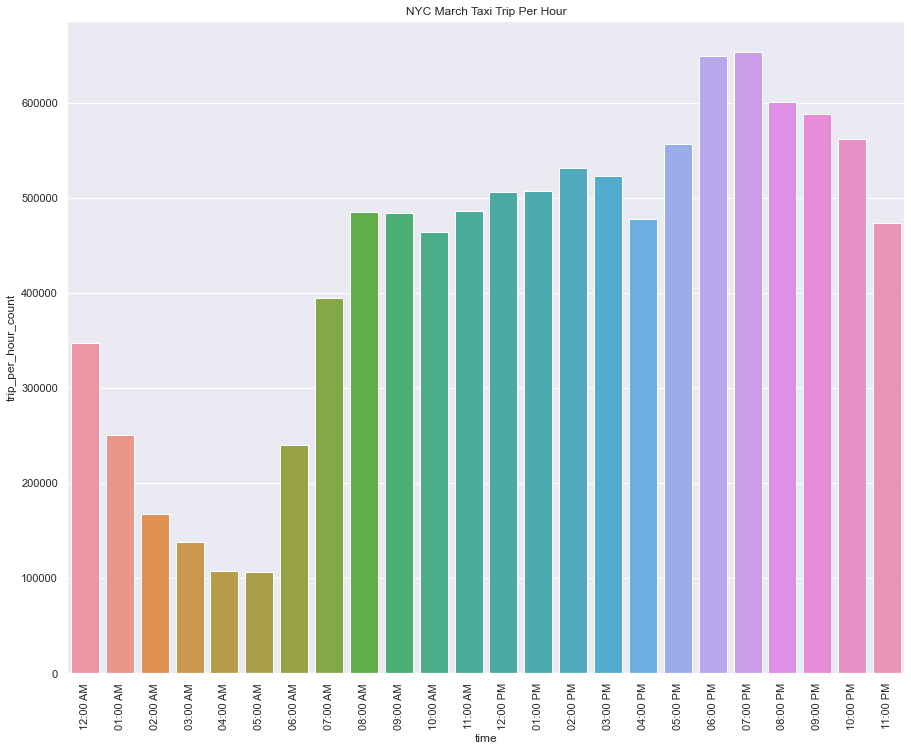

In [146]:
##Visualization of the Hourly Trip Count in March

nyc_chart = sns.barplot(data = mar_hr_occurence, x = "time", y = "trip_per_hour_count").set_title('NYC March Taxi Trip Per Hour')
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '12:00 AM'),
  Text(1, 0, '01:00 AM'),
  Text(2, 0, '02:00 AM'),
  Text(3, 0, '03:00 AM'),
  Text(4, 0, '04:00 AM'),
  Text(5, 0, '05:00 AM'),
  Text(6, 0, '06:00 AM'),
  Text(7, 0, '07:00 AM'),
  Text(8, 0, '08:00 AM'),
  Text(9, 0, '09:00 AM'),
  Text(10, 0, '10:00 AM'),
  Text(11, 0, '11:00 AM'),
  Text(12, 0, '12:00 PM'),
  Text(13, 0, '01:00 PM'),
  Text(14, 0, '02:00 PM'),
  Text(15, 0, '03:00 PM'),
  Text(16, 0, '04:00 PM'),
  Text(17, 0, '05:00 PM'),
  Text(18, 0, '06:00 PM'),
  Text(19, 0, '07:00 PM'),
  Text(20, 0, '08:00 PM'),
  Text(21, 0, '09:00 PM'),
  Text(22, 0, '10:00 PM'),
  Text(23, 0, '11:00 PM')])

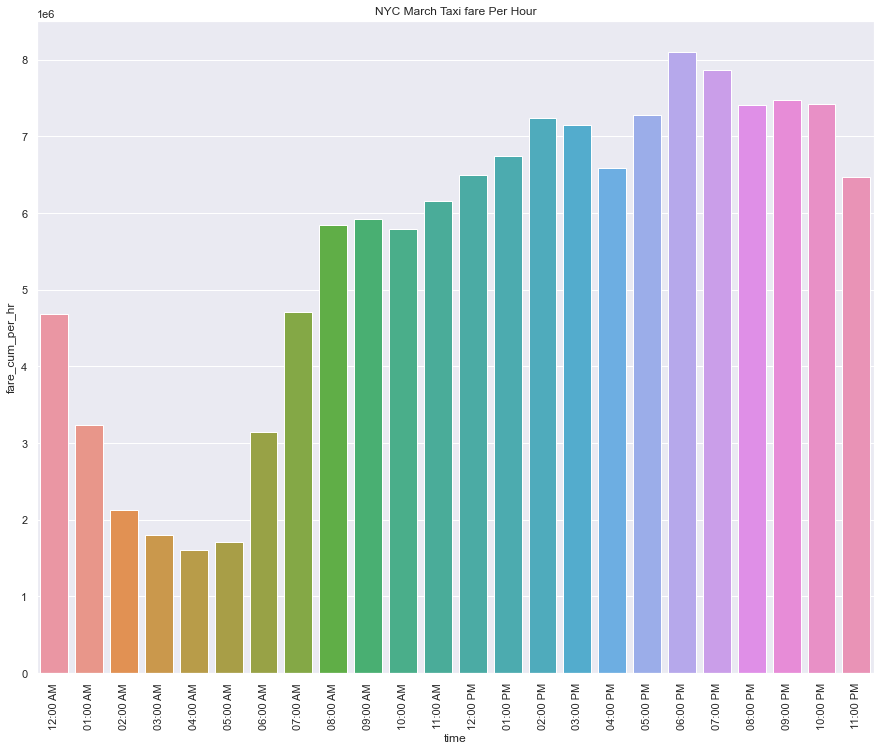

In [155]:
##Visualization of the Hourly Trip Count in March

nyc_f_chart = sns.barplot(data = mar_hr_occurence, x = "time", y = "fare_cum_per_hr").set_title('NYC March Taxi fare Per Hour')
plt.xticks(rotation = 90)


##### Pattern #1
###### As depicted in the Chart above, there are three cycles of high and low movements in the time spectrum
* From 05:00 AM to 10:00 AM ~~ This depicts a behavioural pattern of people trying to get to their workplaces.
* From 10:00 AM to 04:00 PM ~~ 
* From 04:00 PM to 05:00 AM ~~ This depicts a behavioural pattern of people trying to get back from work.

* Hour with the Highest Trip is 06:00 PM and 07:00 PM

In [66]:
mar_data.passenger_count.value_counts()

1    7424872
2    1465247
5     499892
3     413520
6     300651
4     189766
0        595
8         34
7         31
9         20
Name: passenger_count, dtype: int64

In [105]:
null_passenger.payment_type.value_counts()

1    486
2     66
3     39
4      4
Name: payment_type, dtype: int64

In [41]:
mar_data.fare_amount.value_counts()

 6.00     510184
 6.50     502146
 5.50     497886
 7.00     492645
 7.50     468381
           ...  
 31.53         1
 30.03         1
 53.20         1
 53.70         1
-49.00         1
Name: fare_amount, Length: 2068, dtype: int64

In [76]:
# from datetime import datetime

# # current date and time
# now = datetime.now()

# timestamp = datetime.timestamp(now)
# print("timestamp =", timestamp)

# print("current time =", now)

timestamp = 1617560943.640988
current time = 2021-04-04 19:29:03.640988
